In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from scipy import stats


In [3]:
df = pd.read_csv('E:\\projects\\automobile.csv')


In [4]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201,201,201,199,201,201,201,201.000000,...,201.000000,201,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,113,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [7]:
df1 = df.replace("?",np.nan,inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430


In [8]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      37
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

fuel-type
fuel-type
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    199
True       2
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Nam

In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis = 0)
print("Average of normalized-losses:",avg_norm_loss)

Average of normalized-losses: 122.0


In [11]:
df["normalized-losses"].replace(np.nan,avg_norm_loss,inplace=True)

In [12]:
avg_bore = df["bore"].astype("float").mean(axis = 0)
print("Average of bore:",avg_bore)

Average of bore: 3.330710659898477


In [13]:
df["bore"].replace(np.nan,avg_bore,inplace=True)

In [14]:
avg_horsepower = df["horsepower"].astype("float").mean(axis = 0)
print("Average of horsepower:",avg_horsepower)

Average of horsepower: 103.39698492462311


In [15]:
df["horsepower"].replace(np.nan,avg_horsepower,inplace = True)

In [16]:
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis = 0)
print("Average of peak_rpm:",avg_peak_rpm)

Average of peak_rpm: 5117.587939698493


In [17]:
df["peak-rpm"].replace(np.nan,avg_peak_rpm,inplace = True)

In [18]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:",avg_stroke)


Average of stroke: 3.256903553299492


In [19]:
df["stroke"].replace(np.nan,avg_stroke,inplace = True)

In [20]:
df["num-of-doors"].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

In [21]:
df["num-of-doors"].value_counts().idxmax()

'four'

In [22]:
df["num-of-doors"].replace(np.nan,"four",inplace=True)

In [23]:
df["num-of-doors"].value_counts()

num-of-doors
four    115
two      86
Name: count, dtype: int64

In [24]:
df.dropna(subset=["price"],axis= 0,inplace=True)

df.reset_index(drop=True, inplace=True)


In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [26]:

df['city-L/100km']= 235/df["city-mpg"]

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556


In [28]:

df["highway-mpg"] = 235/df["highway-mpg"]


df.rename(columns={'"highway-mpg"':"highway-L/100km"},inplace = True)

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450,13.055556


In [29]:
# Define a function to convert price to dollars
def convert_to_dollars(price):
    return '$' + str(price)

# Apply the conversion function to the price column and store the result in a new column
df['price_in_dollars'] = df['price'].apply(convert_to_dollars)


In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,price_in_dollars
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495,11.190476,$13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500,11.190476,$16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500,12.368421,$16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950,9.791667,$13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450,13.055556,$17450


In [31]:
df.describe()



,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


In [32]:
df[["length","width","height"]].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [33]:
df['length']= df['length']/df['length'].max()
df['width']= df['width']/df['width'].max()
df['height']= df['height']/df['height'].max()

In [34]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [35]:
# Binning means

df[["horsepower"]]


,horsepower
0,111.0
1,111.0
2,154.0
3,102.0
4,115.0
...,...
196,114.0
197,160.0
198,134.0
199,106.0


In [36]:
df["horsepower"]= df["horsepower"].astype(int, copy=True)

df["horsepower"]

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)
group_names = ['low','Medium','high']
df['horsepower-binned'] = pd.cut(df['horsepower'],bins, labels=group_names)
df.dropna(subset=['horsepower-binned'], inplace=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,Medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,Medium
9,101,low


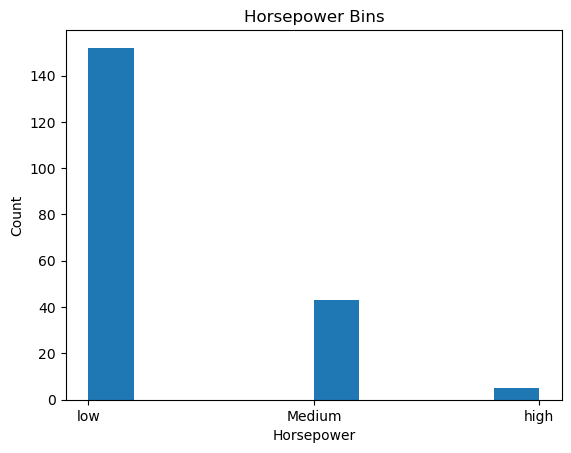

In [37]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df['horsepower-binned'] = df['horsepower-binned'].astype(str)

plt.hist(df["horsepower-binned"])
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")
plt.show()


In [38]:
#  EXPLORTORY-DATA-ANALYSIS (EDA)


In [39]:
#correlation

df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.061513,-0.000059,0.561673
stroke,-0.061513,1.000000,0.187511,0.092884
compression-ratio,-0.000059,0.187511,1.000000,-0.216843
horsepower,0.561673,0.092884,-0.216843,1.000000


(0.0, 53201.8756275018)

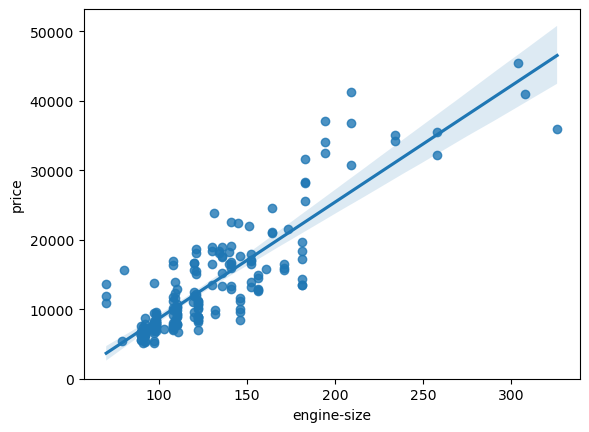

In [40]:
# positive linear relationship

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [41]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872024
price,0.872024,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

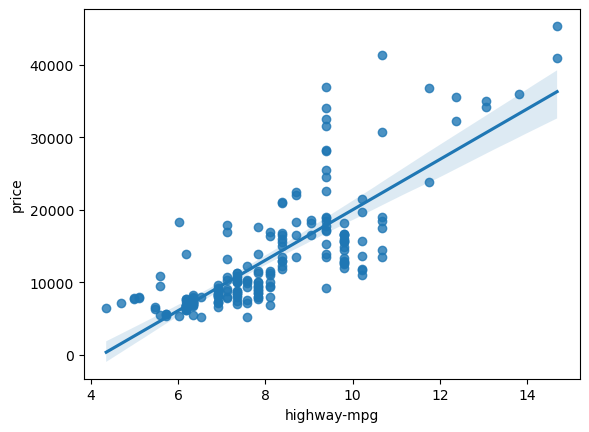

In [42]:
sns.regplot(x = "highway-mpg", y = "price", data = df)

In [43]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,0.800957
price,0.800957,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

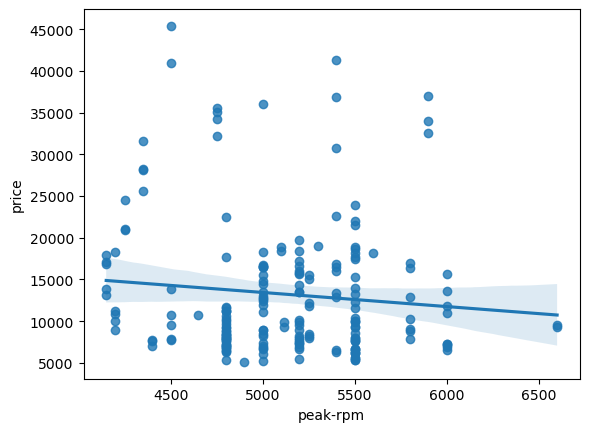

In [44]:
sns.regplot(x = "peak-rpm", y = "price", data = df)

In [45]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101993
price,-0.101993,1.000000


In [46]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.078916
price,0.078916,1.000000


<Axes: xlabel='stroke', ylabel='price'>

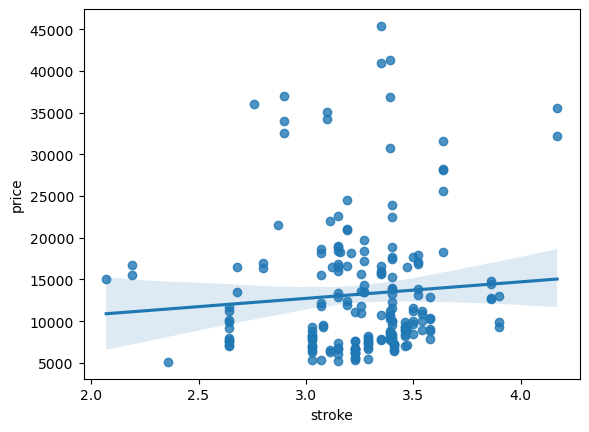

In [47]:
sns.regplot(x = "stroke", y = "price", data = df)

<Axes: xlabel='body-style', ylabel='price'>

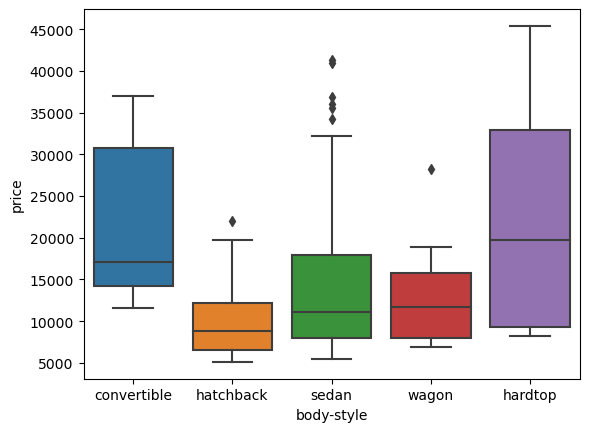

In [48]:
# Co-relationship

sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

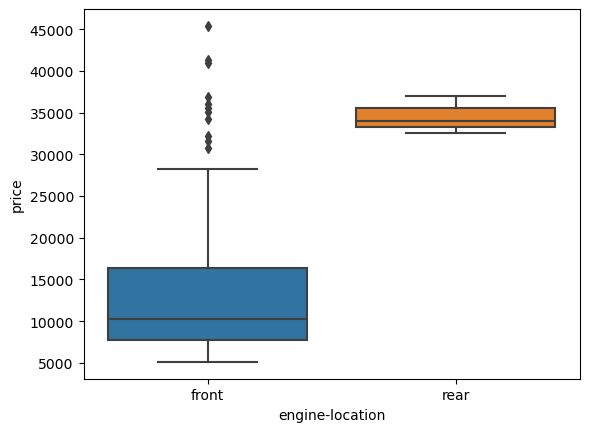

In [49]:
sns.boxplot(x = "engine-location", y = "price", data = df)

<Axes: xlabel='drive-wheels', ylabel='price'>

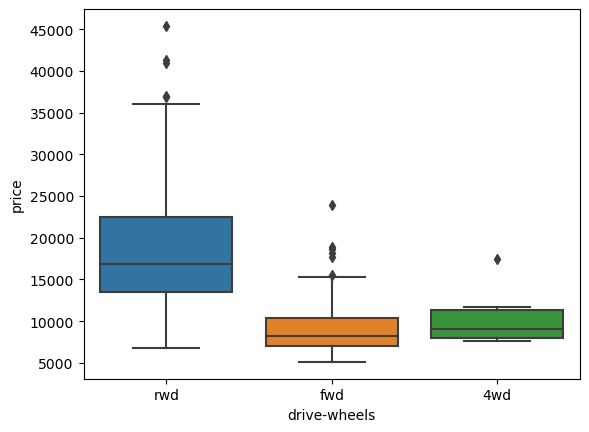

In [50]:
sns.boxplot(x = "drive-wheels", y = "price", data = df)

In [51]:
# Descriptive statistical analysis

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.83500,122.005000,98.849000,0.837898,0.915514,0.899156,2561.005000,127.205000,3.332814,3.258038,10.167600,103.670000,5117.675879,25.070000,8.063012,13247.410000,9.968866
std,1.25525,32.076463,6.036539,0.058275,0.028736,0.041031,513.014389,41.387165,0.267076,0.316430,4.014738,37.251975,479.311332,6.249832,1.827428,7946.411902,2.516550
min,-2.00000,65.000000,86.600000,0.694858,0.858333,0.799331,1713.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.00000,100.250000,94.500000,0.801538,0.891319,0.869565,2184.750000,98.000000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,6.911765,7784.750000,7.833333
50%,1.00000,122.000000,97.000000,0.832292,0.909722,0.904682,2417.000000,120.000000,3.320000,3.290000,9.000000,95.000000,5158.793970,24.000000,7.833333,10320.000000,9.791667
75%,2.00000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.750000,12.368421
max,3.00000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


In [52]:
df.describe(include = ['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price_in_dollars,horsepower-binned
count,200,200,200,200,200,200,200,200,200,200,200,200
unique,22,2,2,2,5,3,2,6,6,8,185,3
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,$8495,low
freq,32,180,164,115,94,117,197,145,157,92,2,152


In [53]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    117
rwd     75
4wd      8
Name: count, dtype: int64

In [54]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels1': 'value_counts'})
drive_wheels_counts

,count
drive-wheels,
fwd,117
rwd,75
4wd,8


In [55]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()

engine_loc_counts.head(10)

,count
engine-location,
front,197
rear,3


In [56]:
# basics of Grouping

df['drive-wheels'].unique()



array(['rwd', 'fwd', '4wd'], dtype=object)

In [57]:
df_group_one = df[["drive-wheels","price"]]
df_group_one

,drive-wheels,price
0,rwd,13495
1,rwd,16500
2,rwd,16500
3,fwd,13950
4,4wd,17450
...,...,...
196,rwd,16845
197,rwd,19045
198,rwd,21485
199,rwd,22470


In [58]:
grouped_test = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
grouped_test

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9279.769231
2,rwd,19757.613333


In [59]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8464.000000
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [60]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8464.000000   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [61]:
df_gptest2 = df[,'price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10029.179104
3,sedan,14459.755319
4,wagon,12371.960000


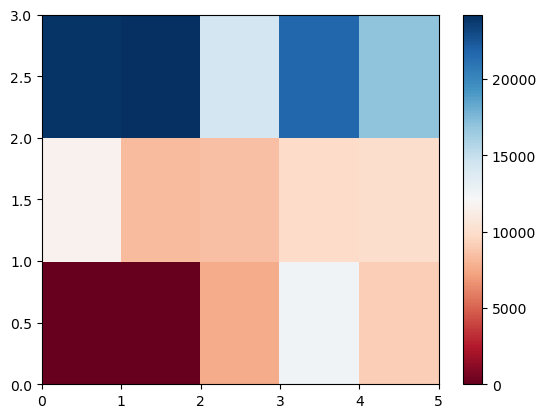

In [62]:
# Releationship with Drive Wheels and Body Style vs. Price

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

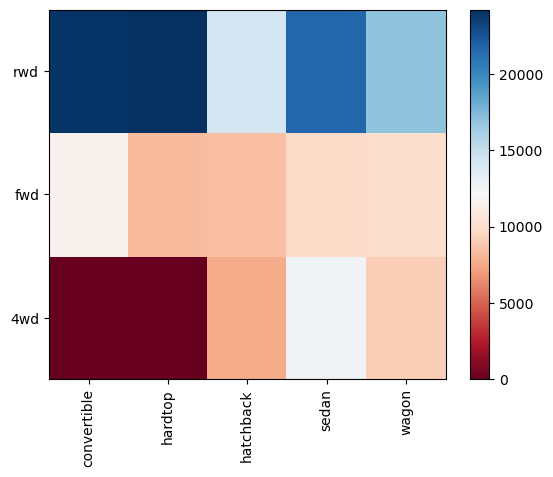

In [63]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [64]:
# Correlation and Causation


In [65]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5817132408753356  with a P-value of P = 1.6741233030208197e-19


In [66]:

nan_values = df.isna().sum()
print("NaN values in DataFrame:")
print(nan_values)

inf_values = df.isin([np.inf, -np.inf]).sum()
print("\nInfinite values in DataFrame:")
print(inf_values)

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  



NaN values in DataFrame:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
price_in_dollars     0
horsepower-binned    0
dtype: int64

Infinite values in DataFrame:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width      

In [67]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6913494781494154  with a P-value of P =  9.190889116345163e-30


In [68]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7531354467954671  with a P-value of P = 7.339912613026282e-38


In [69]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.835021883197705  with a P-value of P =  2.858346147718497e-53


In [70]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8720241350189741  with a P-value of P = 2.3788186066775877e-63


In [71]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5398978954125515  with a P-value of P =   1.5844832015568345e-16


In [72]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6913465948945459  with a P-value of P =  9.197877971831629e-30


In [73]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8009574869278472  with a P-value of P =  5.479311669257528e-46


In [74]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495
1,rwd,16500
3,fwd,13950
4,4wd,17450
5,fwd,15250
136,4wd,7603


In [75]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
196,rwd,sedan,16845
197,rwd,sedan,19045
198,rwd,sedan,21485
199,rwd,sedan,22470


In [76]:
grouped_test2.get_group('4wd')['price']

4      17450
136     7603
140     9233
141    11259
144     8013
145    11694
150     7898
151     8778
Name: price, dtype: int64

In [77]:
# ANOVA :- Analysis of Variance

       # The Analysis of Variance (ANOVA) is a statistical method used to test whether 
       # there are significant differences between the means of two or more groups. ANOVA returns two parameters:
        
       # F-test score: ANOVA assumes the means of all groups are the same,
       # calculates how much the actual means deviate from the assumption, and reports it as the F-test score.
       # A larger score means there is a larger difference between the means.

       # P-value: P-value tells how statistically significant our calculated score value is.

       # If our price variable is strongly correlated with the variable we are analyzing,
       # we expect ANOVA to return a sizeable F-test score and a small p-value.

In [78]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
               grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.12684882259785 , P = 5.876123262694183e-23


In [79]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 128.8734744035462 , P = 3.9200364546279194e-23


In [80]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [81]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.6217971622651529 , P = 0.43189741227446377


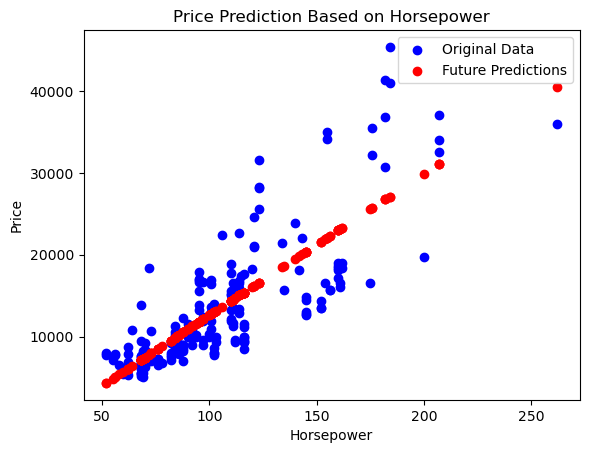

In [97]:

plt.scatter(df["horsepower"], y_train, color='blue', label='Original Data')  # Scatter plot for original data
plt.scatter(df["horsepower"], future_predictions, color='red', label='Future Predictions')  # Line plot for future predictions
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Price Prediction Based on Horsepower")
plt.legend()
plt.show()


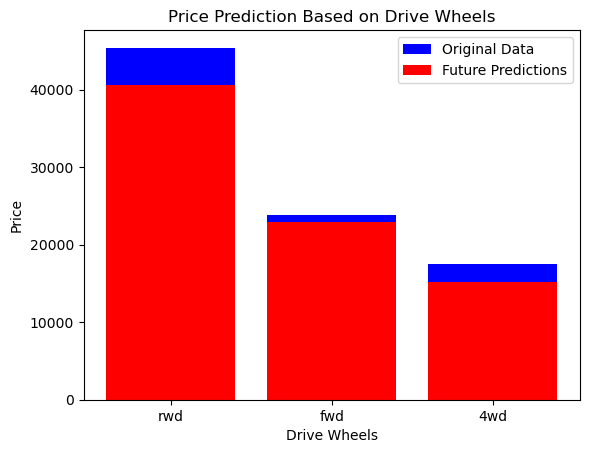

In [92]:
# Step 5: Plot the updated data
# Use a bar plot to visualize the relationship between categorical features and the target variable
plt.bar(df["drive-wheels"], y_train, color='blue', label='Original Data')  # Bar plot for original data
plt.bar(df["drive-wheels"], future_predictions, color='red', label='Future Predictions')  # Bar plot for future predictions
plt.xlabel("Drive Wheels")
plt.ylabel("Price")
plt.title("Price Prediction Based on Drive Wheels")
plt.legend()
plt.show()


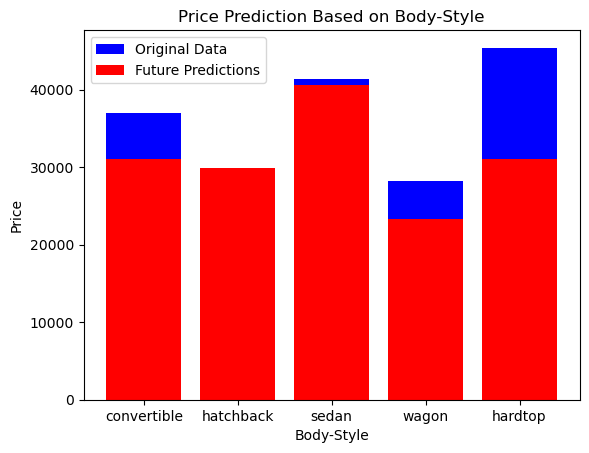

In [93]:
plt.bar(df["body-style"], y_train, color='blue', label='Original Data')  # Bar plot for original data
plt.bar(df["body-style"], future_predictions, color='red', label='Future Predictions')  # Bar plot for future predictions
plt.xlabel("Body-Style")
plt.ylabel("Price")
plt.title("Price Prediction Based on Body-Style")
plt.legend()
plt.show()
